#SciPy

In [34]:
import numpy as np
import pandas as pd
import scipy.stats.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
heights = np.array([1.46, 1.79, 2.01, 1.75, 1.56, 1.69, 1.88, 1.76, 1.88, 1.78])

In [4]:
#This is all with numpy 
print "mean:", heights.mean()
print "min:", heights.min()
print "max:", heights.max()
print "standard deviation:", heights.std()

mean: 1.756
min: 1.46
max: 2.01
standard deviation: 0.150811140172


In [45]:
heights_df = pd.DataFrame(heights)

In [15]:
heights_df.columns = ['heights']

In [46]:
heights_df

,0
0,1.46
1,1.79
2,2.01
3,1.75
4,1.56
5,1.69
6,1.88
7,1.76
8,1.88
9,1.78


In [47]:
#This is all with pandas 
print "max:",heights_df.max()
print "standard deviation:", heights_df.std()
print "kurtosis:", heights_df.kurtosis() # you can't use kurtosis in numpy
print "skew:", heights_df.skew()

max: 0    2.01
dtype: float64
standard deviation: 0    0.158969
dtype: float64
kurtosis: 0    0.379705
dtype: float64
skew: 0   -0.466663
dtype: float64


(array([ 1.,  1.,  0.,  0.,  1.,  3.,  1.,  2.,  0.,  1.]),
 array([ 1.46 ,  1.515,  1.57 ,  1.625,  1.68 ,  1.735,  1.79 ,  1.845,
         1.9  ,  1.955,  2.01 ]),
 <a list of 10 Patch objects>)

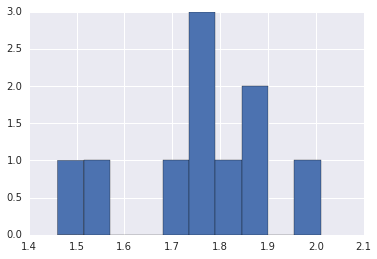

In [35]:
plt.hist(heights)

In [48]:
# This is with scipy.stats
print "median:", st.nanmedian(heights)
print "mode:", st.mode(heights)
print "skewness:", st.skew(heights, bias = False)
print "kurtosis:", st.kurtosis(heights, bias = False)
#you need to put bias=False to get comparable results to scipy.

median: 1.77
mode: (array([ 1.88]), array([ 2.]))
skewness: -0.466662599037
kurtosis: 0.37970468438


#Probability Distributions

In [49]:
from scipy.stats import norm


In [50]:
#this gives you a numpy array with 500 elements, randomly valued according to the standard normal distribution (mean = 0, std =1)
x_norm = norm.rvs(size = 500)
print type(x_norm)

<type 'numpy.ndarray'>


counts [   3.    9.   22.   53.  110.  126.   89.   55.   26.    7.]
bin centers [-3.09987191 -2.52263114 -1.94539038 -1.36814961 -0.79090885 -0.21366808
  0.36357268  0.94081345  1.51805421  2.09529498  2.67253574]


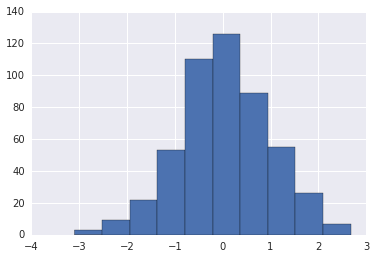

In [59]:
h = plt.hist(x_norm, bins = 10)
print "counts", h[0]
print "bin centers", h[1]

In [55]:
#mean and standard deviation are not quite exactly 0 and 1
print "mean:", x_norm.mean()
print "std", x_norm.std()

mean: 0.0362661704009
std 0.94778025692


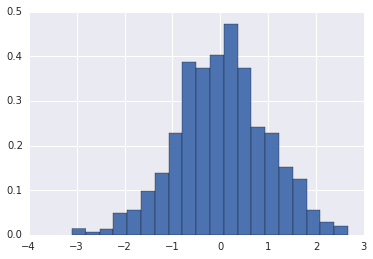

In [60]:
#normed makes the area under the curve sum to 1
h = plt.hist(x_norm, normed = True, bins = 20)

In [61]:
print "mean:", x_norm.mean()
print "std", x_norm.std()

mean: 0.0362661704009
std 0.94778025692


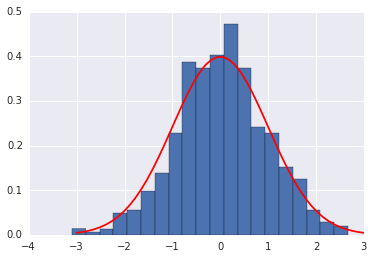

In [69]:
x = np.linspace(-3,3,50)
h = plt.hist(x_norm, normed = True, bins = 20)
#this uses the probability distribution function of our normal distribution function to see how these overlay each other
p = plt.plot(x, norm.pdf(x), 'r-')

95.45% of values lie between -2 and +2


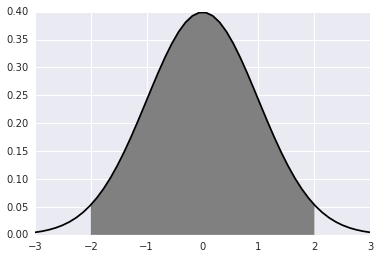

In [73]:
# calculate the probability of the next value from a random variable falling inside a certain range
from scipy.integrate import trapz #trapezoidal integration(calculating the area under a trapezoid)
x1 = np.linspace(-2,2,100)
p = trapz(norm.pdf(x1),x1) #sums up area under the curve
print "{:.2%} of values lie between -2 and +2".format(p)
fb = plt.fill_between(x1, norm.pdf(x1), color = "gray")
p = plt.plot(x, norm.pdf(x), '-k')
# I don't yet understand how this probability density function is working

In [74]:
print(x1)

[-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384 -1.7979798
 -1.75757576 -1.71717172 -1.67676768 -1.63636364 -1.5959596  -1.55555556
 -1.51515152 -1.47474747 -1.43434343 -1.39393939 -1.35353535 -1.31313131
 -1.27272727 -1.23232323 -1.19191919 -1.15151515 -1.11111111 -1.07070707
 -1.03030303 -0.98989899 -0.94949495 -0.90909091 -0.86868687 -0.82828283
 -0.78787879 -0.74747475 -0.70707071 -0.66666667 -0.62626263 -0.58585859
 -0.54545455 -0.50505051 -0.46464646 -0.42424242 -0.38383838 -0.34343434
 -0.3030303  -0.26262626 -0.22222222 -0.18181818 -0.14141414 -0.1010101
 -0.06060606 -0.02020202  0.02020202  0.06060606  0.1010101   0.14141414
  0.18181818  0.22222222  0.26262626  0.3030303   0.34343434  0.38383838
  0.42424242  0.46464646  0.50505051  0.54545455  0.58585859  0.62626263
  0.66666667  0.70707071  0.74747475  0.78787879  0.82828283  0.86868687
  0.90909091  0.94949495  0.98989899  1.03030303  1.07070707  1.11111111
  1.15151515  1.19191919  1.23232323  1.27272727  1.3

13.59% of values lie between -2 and +2


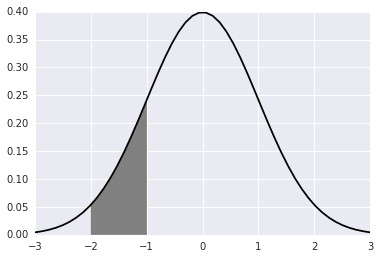

In [78]:
x1 = np.linspace(-2,-1,100)
p = trapz(norm.pdf(x1),x1) #sums up area under the curve
print "{:.2%} of values lie between -2 and +2".format(p)
fb = plt.fill_between(x1, norm.pdf(x1), color = "gray")
p = plt.plot(x, norm.pdf(x), '-k')